In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1wQBb-3vNe5YkRUeNIfX5M4C59DZ2cafB'}) # replace the id with id of file you want to access
downloaded.GetContentFile('6-player batch.PNG') 
downloaded1 = drive.CreateFile({'id':'1WnVnRiZiUGxi0U0eLz4pS7dX5DvfS74v'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('6player.PNG')


In [0]:
import cv2
import numpy as np

img_rgb = cv2.imread('6player.PNG')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('6-player batch.PNG',0)
w, h = template.shape[::-1]

In [0]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

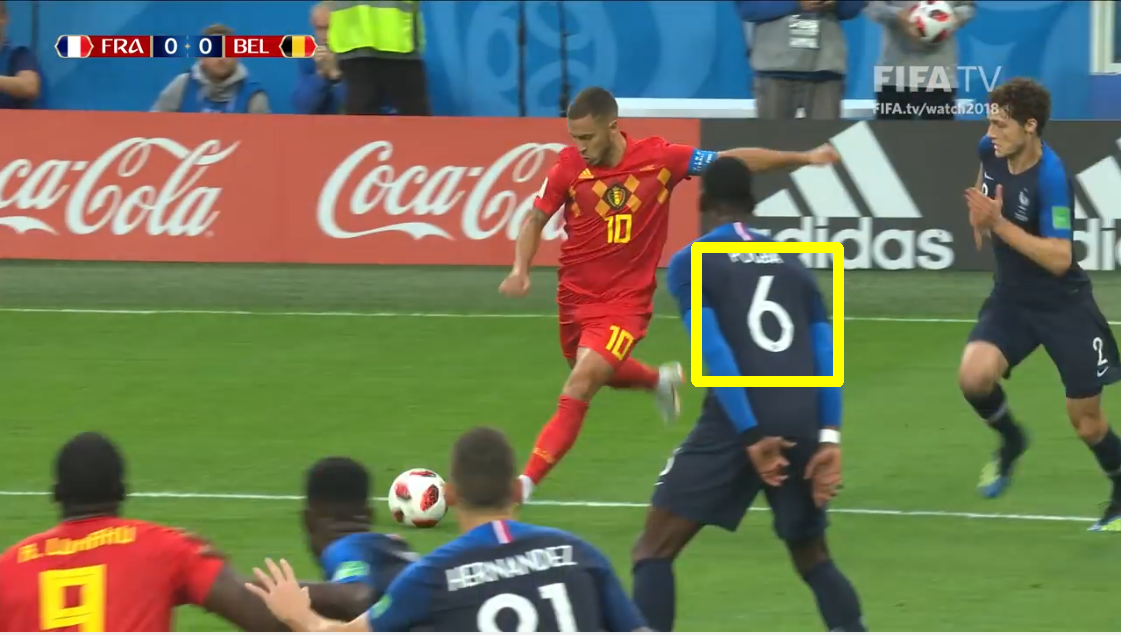

In [0]:
import cv2
from google.colab.patches import cv2_imshow
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)


cv2_imshow(img_rgb)